In [1]:
import torch
import numpy as np 
from torch.autograd import Variable
import torch.nn.functional as fun
import matplotlib.pyplot as plt
import torch.utils.data as Data
import torch.nn as nn
import torchvision 
import torchvision.datasets as dsets

In [2]:
#超参数
TIME_STEP=10
INPUT_SIZE=1
LR=0.02

In [11]:
#定义网络
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.rnn=nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,
            num_layers=1,
            batch_first=True
        )
        self.out=nn.Linear(32,1)
    def forward(self,x,h_state):
        #x:(batch,time_step,input_size);h_state:(n_layers,batch,hidden_size);r_out:(batch,time_step,hidden_size)
        r_out,h_state=self.rnn(x,h_state)
        outs=[]
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs,dim=1),h_state

In [12]:
#初始化
rnn=RNN()

In [16]:
#优化器
h_state=None
optimizer=torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func=nn.MSELoss()

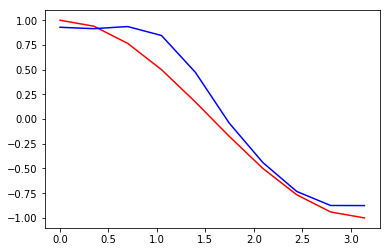

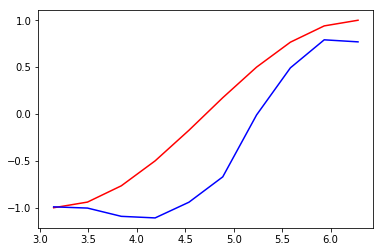

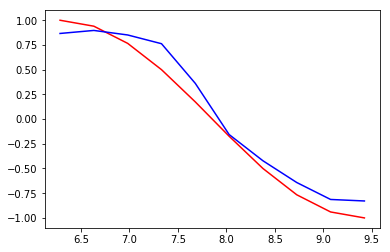

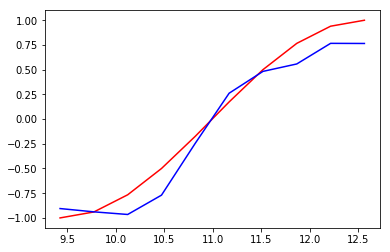

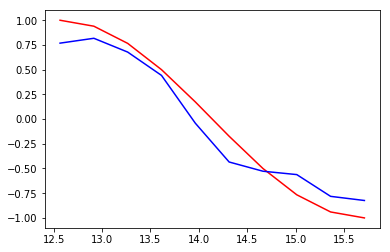

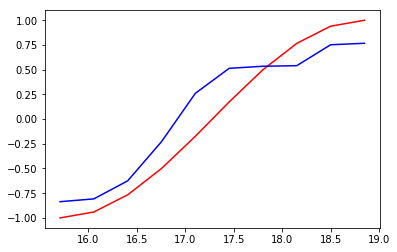

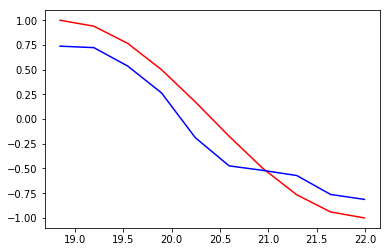

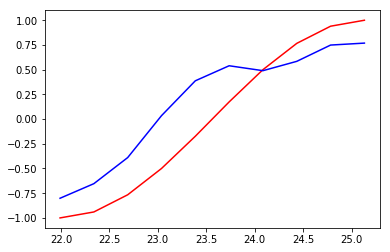

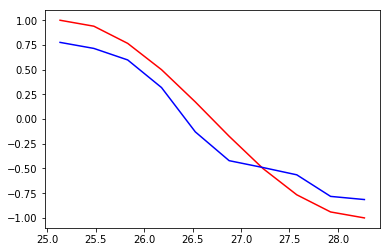

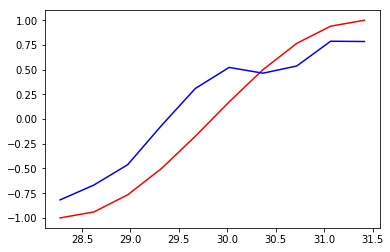

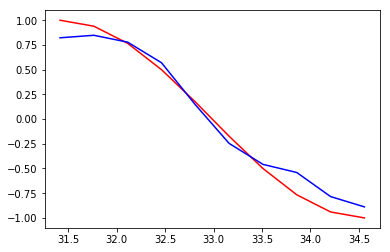

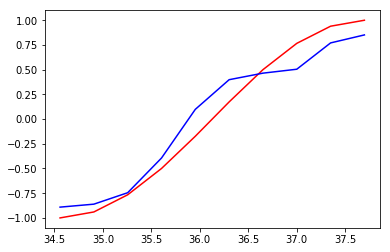

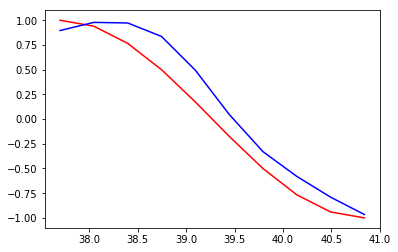

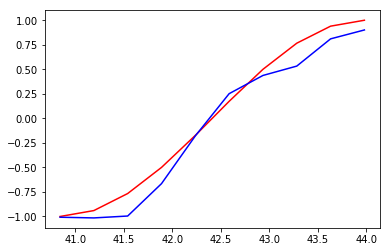

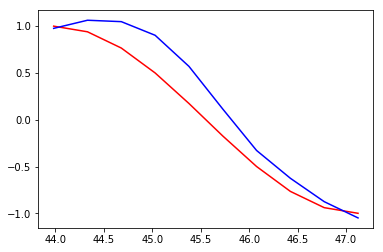

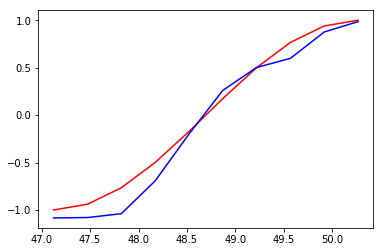

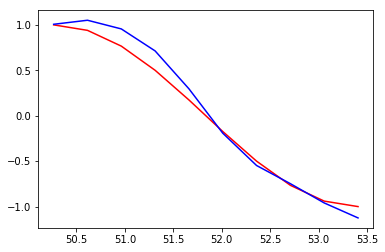

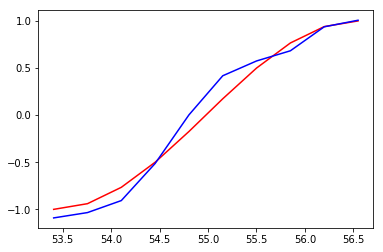

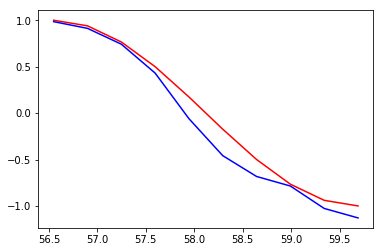

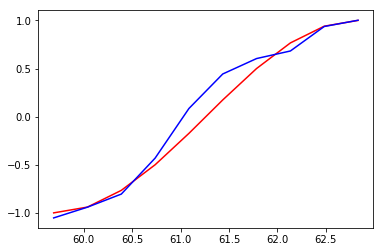

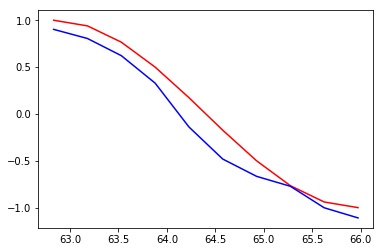

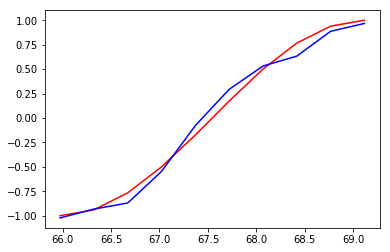

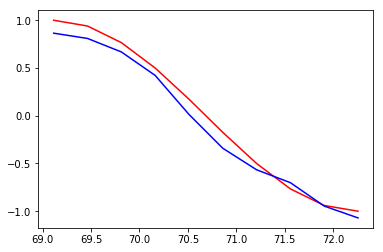

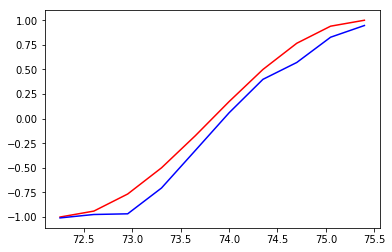

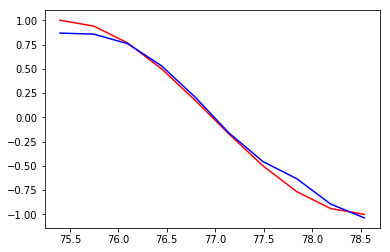

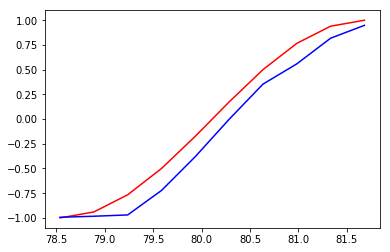

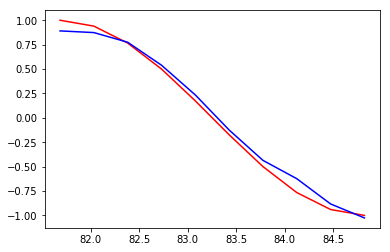

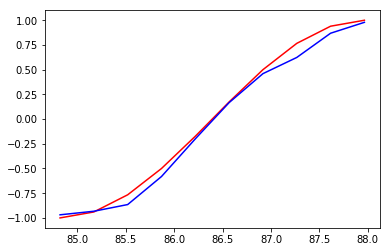

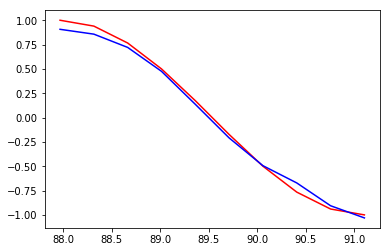

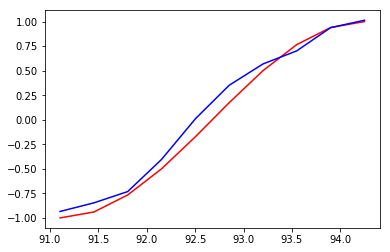

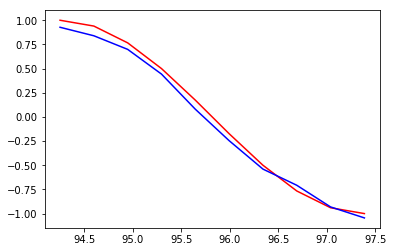

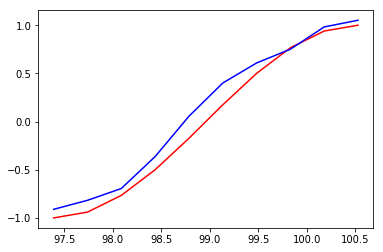

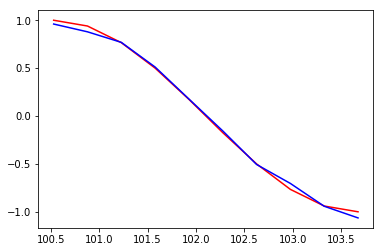

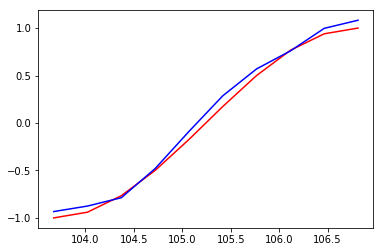

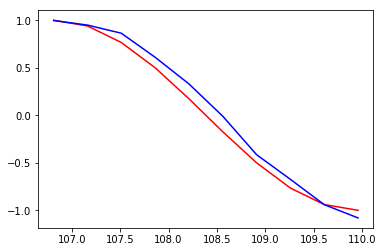

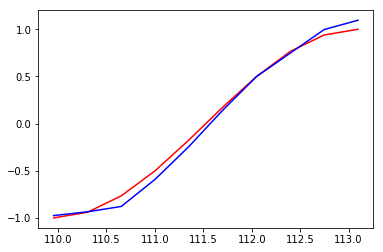

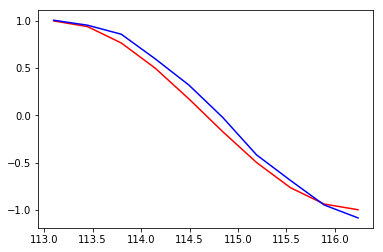

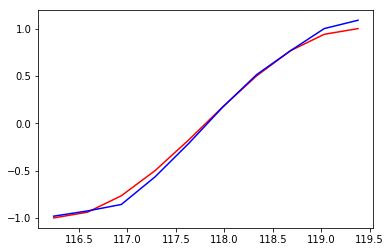

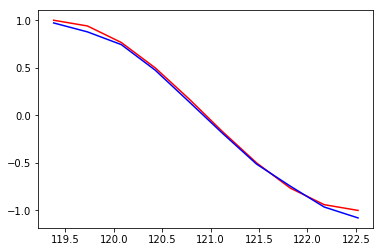

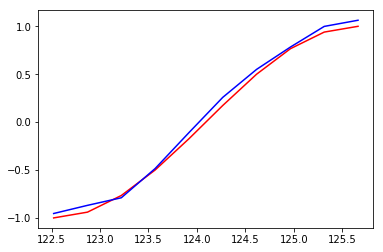

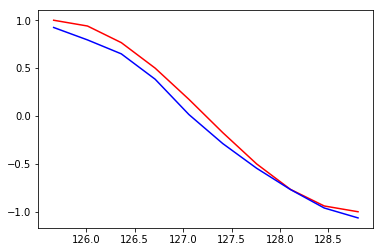

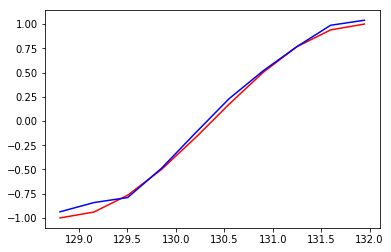

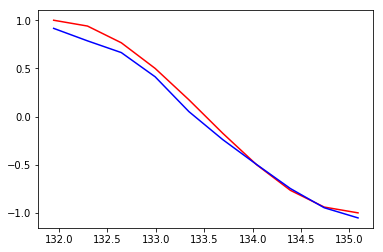

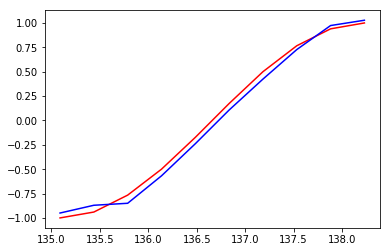

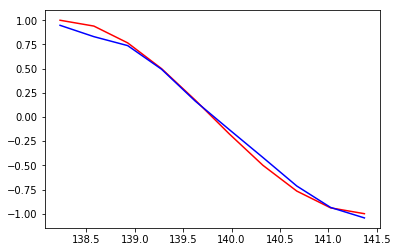

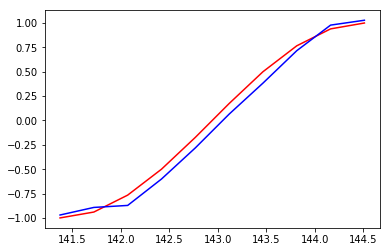

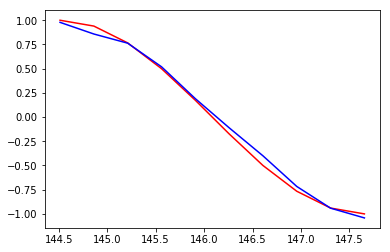

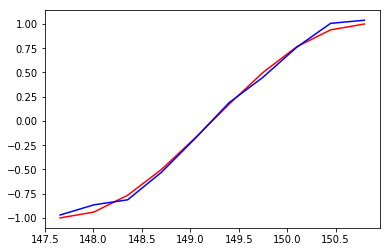

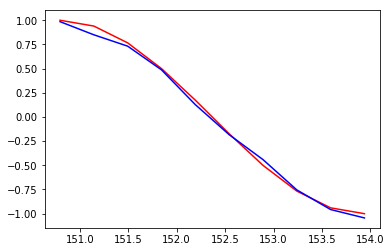

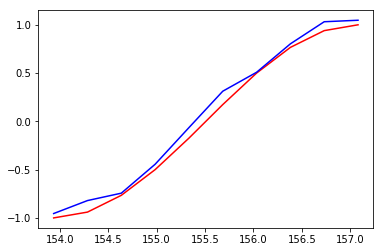

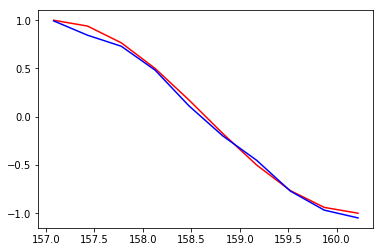

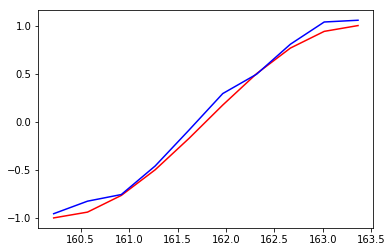

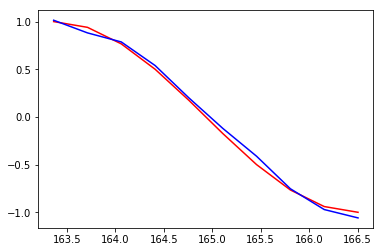

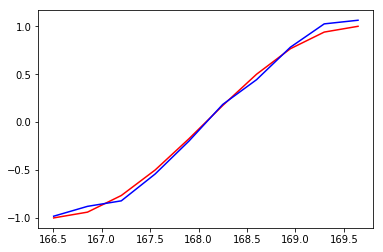

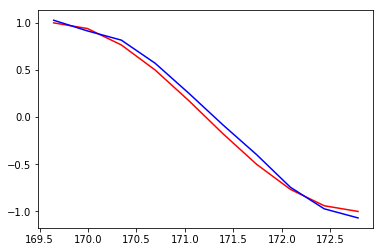

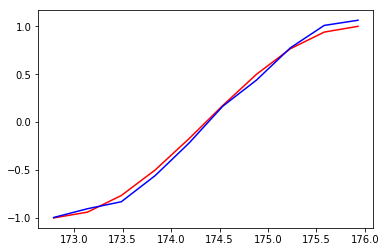

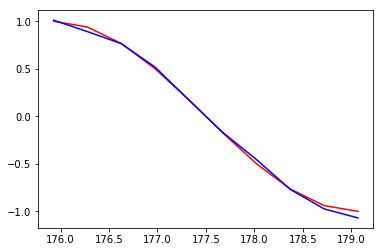

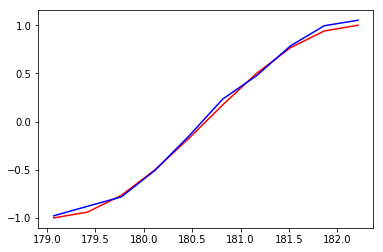

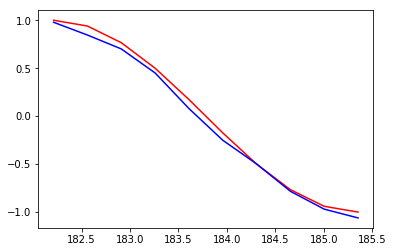

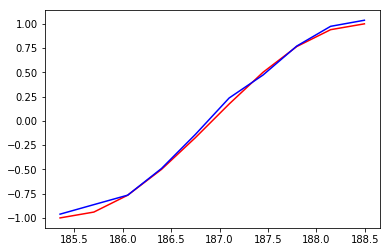

In [18]:
#训练
for step in range(60):
    #数据准备
    start,end =step*np.pi,(step+1)*np.pi
    steps=np.linspace(start,end,TIME_STEP,dtype=np.float32)
    x_np=np.sin(steps)
    y_np=np.cos(steps)
    #转化
    x=Variable(torch.from_numpy(x_np[np.newaxis,:,np.newaxis]))
    y=Variable(torch.from_numpy(y_np[np.newaxis,:,np.newaxis]))
    
    prediction,h_state=rnn(x,h_state)
    h_state=Variable(h_state.data)
    #反传
    loss=loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 画图
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)